<a href="https://colab.research.google.com/github/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/AERFAI_summer_school_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Neural Networks for Pattern Recognition
## AERFAI - Online Summer School on Pattern Recognition and Machine Learning

[![View on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/AERFAI_summer_school_2021.ipynb)

---

Graph Neural Networks (GNNs) have recently gained increasing popularity due to its novel uses in different domains such as Computer Vision, Natural Language Processing, Chemistry, Social Networks or Knowledge Graphs. In this tutorial, we will cover the basic usage of GNN for the problem of node or graph classification. In particular, we will build a GNN from scratch to understand the explained notation and concepts. Later, we will use the provided implementations of several GNN to check the difference in performance.

We will use [PyTorch](https://pytorch.org/) as our Deep Learning framework and the [Deep Graph Library (DGL)](https://www.dgl.ai/) as our GNN library.

## Prepare environment

Let's start preparing the environment we will use all over the session. First we will change the runtime to work on GPUs and later, we will install all the required libraries.

### Change runtime of notebook to GPU


```
  Select Runtime -> Change Runtime type -> select runtime python 3 and hardward accelerator GPU
```

### Install requirements

The basic libraries that will be used are:

*   [Network](https://networkx.github.io/)
*   [Pytorch](https://pytorch.org/)
*   [DGL](https://www.dgl.ai/)



In [47]:
!pip3 install torch
!pip3 install dgl-cu110

## Get the Data

The DGL provides several classes for reading graphs!

Check:  https://docs.dgl.ai/api/python/dgl.data.html

In the following sections we will see how we can load their data, and how it is represented. Finally, we will review how to use a custom dataset.

### Mini Graph Classification Dataset (MiniGCDataset)

This dataset is synthetic and we should define de number and size of the graphs for each set (train, validation and test).

*   class 0 : cycle graph
*   class 1 : star graph
*   class 2 : wheel graph
*   class 3 : lollipop graph
*   class 4 : hypercube graph
*   class 5 : grid graph
*   class 6 : clique graph
*   class 7 : circular ladder graph

Graph(num_nodes=16, num_edges=80,
      ndata_schemes={}
      edata_schemes={})
{}
{}


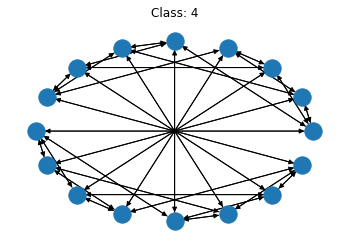

In [48]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt 

dgl.backend = 'pytorch'

dataset = dgl.data.MiniGCDataset(100, 23, 50)
# Transfer NetworkX graph with the corresponding attributes
g, label = dataset[50]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label))
plt.show()

### Graph kernel dataset

It allows loading the data from: ENZYMES, DD, COLLAB and MUTAG

Graph(num_nodes=26, num_edges=60,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'node_labels': Scheme(shape=(1,), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'edge_labels': Scheme(shape=(1,), dtype=torch.int64)})
{'_ID': tensor([888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901,
        902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913]), 'node_labels': tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [2],
        [2],
        [1],
        [2],
        [2]])}
{'_ID': tensor([1971, 1991, 1970, 1973, 1972, 1975, 1985, 1974, 1977, 2025, 1976, 1979,
        1978, 1981, 1980, 1983, 2007, 1982, 1984, 1987, 1986, 1989, 2001, 1988,
        1990, 1993, 1992, 1995, 1994, 1997, 1996

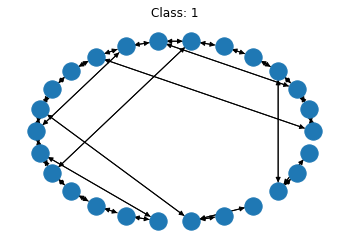

In [49]:
dataset = dgl.data.TUDataset('MUTAG')
# Transfer NetworkX graph with the corresponding attributes
g, label = dataset[50]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Label
print(label)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

### Cora Graph Dataset

Is a citation network graph.

Nodes mean paper and edges mean citation relationships. Each node has a predefined feature with 1433 dimensions. The dataset is designed for the node classification task. The task is to predict the category of certain paper.

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False

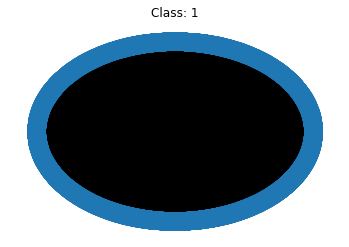

In [50]:
dataset = dgl.data.CoraGraphDataset()

# Transfer NetworkX graph with the corresponding attributes
g = dataset[0]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Node classification dataset divides the nodes into training, validation and test sets
print(g.ndata['train_mask'])
print(g.ndata['val_mask'])
print(g.ndata['test_mask'])

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

### To Define a custom Dataset
Pytorch provides an abstract class representig a dataset, ```torch.utils.data.Dataset```. We need to override two methods:

*   ```__len__``` so that ```len(dataset)``` returns the size of the dataset.
*   ```__getitem__``` to support the indexing such that ```dataset[i]``` can be used to get i-th sample

Let us see how we can deal with a custom dataset.


#### Letter Database

Graphs that represent distorted letter drawings. They consider the 15 capital letters of the Roman alphabet that consist of straight lines only (A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z). Each node is labeled with a two-dimensional attribute giving its position relative to a reference coordinate system. Edges are unlabeled. The graph database consists of a training set, a validation set, and a test set of size 750 each. Also, three levels of distortions are provided.

This dataset is part of [IAM Graph Database Repository](http://www.fki.inf.unibe.ch/databases/iam-graph-database) and it is also linked in the [IAPR TC15 resources](https://iapr-tc15.greyc.fr/links.html).

It can be considered as a **TOY EXAMPLE** for graph classification.

> Riesen, K. and Bunke, H.: [IAM Graph Database Repository for Graph Based Pattern Recognition and Machine Learning.](https://link.springer.com/chapter/10.1007/978-3-540-89689-0_33) In: da Vitora Lobo, N. et al. (Eds.), SSPR&SPR 2008, LNCS, vol. 5342, pp. 287-297, 2008.

Lets get the data

In [51]:
!wget https://iapr-tc15.greyc.fr/IAM/Letter.zip
!unzip Letter.zip

--2021-07-24 20:00:40--  https://iapr-tc15.greyc.fr/IAM/Letter.zip
Resolving iapr-tc15.greyc.fr (iapr-tc15.greyc.fr)... 193.55.128.12, 2001:660:7101::12
Connecting to iapr-tc15.greyc.fr (iapr-tc15.greyc.fr)|193.55.128.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3358644 (3.2M) [application/zip]
Saving to: ‘Letter.zip.2’

Letter.zip.2        100%[===================>]   3.20M  3.12MB/s    in 1.0s    

2021-07-24 20:00:42 (3.12 MB/s) - ‘Letter.zip.2’ saved [3358644/3358644]

Archive:  Letter.zip
replace Letter/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#### Prepare data reader

IAM graphs are provided as a GXL file:


```
<gxl>
  <graph id="GRAPH_ID" edgeids="false" edgemode="undirected">
    <node id="_0">
      <attr name="x">
        <float>0.812867</float>
      </attr>
      <attr name="y">
        <float>0.630453</float>
      </attr>
    </node>
    ...
    <node id="_N">
      ...
    </node>
    <edge from="_0" to="_1"/>
    ...
    <edge from="_M" to="_N"/>
  </graph>
</gxl>
```

In [52]:
import numpy as np
import xml.etree.ElementTree as ET
import networkx as nx


def read_letters(file):
  """Parse GXL file and returns a networkx graph
  """
  
  tree_gxl = ET.parse(file)
  root_gxl = tree_gxl.getroot()
  node_label = {}
  node_id = []
  
  # Parse nodes
  for i, node in enumerate(root_gxl.iter('node')):
    node_id += [node.get('id')]
    for attr in node.iter('attr'):
      if (attr.get('name') == 'x'):
        x = float(attr.find('float').text)
      elif (attr.get('name') == 'y'):
        y = float(attr.find('float').text)
    node_label[i] = [x, y]

  node_id = np.array(node_id)

  # Create adjacency matrix
  am = np.zeros((len(node_id), len(node_id)))
  for edge in root_gxl.iter('edge'):
    s = np.where(node_id==edge.get('from'))[0][0]
    t = np.where(node_id==edge.get('to'))[0][0]

    # Undirected Graph
    am[s,t] = 1
    am[t,s] = 1

  # Create the networkx graph
  G = nx.from_numpy_matrix(am)
  nx.set_node_attributes(G, node_label, 'position')
  
  return G

#### Dataset Division

The dataset is divided by means of CXL files in *train*, *validation* and *test* with the correspondance filename and class:


```
<GraphCollection>
  <fingerprints base="/scratch/mneuhaus/progs/letter-database/automatic/0.1" classmodel="henry5" count="750">
    <print file="AP1_0100.gxl" class="A"/>
    ...
    <print file="ZP1_0149.gxl" class="Z"/>
  </fingerprints>
</GraphCollection>
```

In [53]:
def getFileList(file_path):
  """Parse CXL file and returns the corresponding file list and class
  """
  
  elements, classes = [], []
  tree = ET.parse(file_path)
  root = tree.getroot()
  
  for child in root:
    for sec_child in child:
      if sec_child.tag == 'print':
        elements += [sec_child.attrib['file']]
        classes += sec_child.attrib['class']
        
  return elements, classes

#### Define Dataset Class


In [54]:
import torch.utils.data as data
import os

class Letters(data.Dataset):
  """Letter Dataset
  """
  
  def __init__(self, root_path, file_list):
    self.root = root_path
    self.file_list = file_list
    
    # List of files and corresponding labels
    self.graphs, self.labels = getFileList(os.path.join(self.root, self.file_list))
    
    # Labels to numeric value
    self.unique_labels = np.unique(self.labels)
    self.num_classes = len(self.unique_labels)
    
    self.labels = [np.where(target == self.unique_labels)[0][0] 
                   for target in self.labels]
    
    
  def __getitem__(self, index):
    # Read the graph and label
    G = read_letters(os.path.join(self.root, self.graphs[index]))
    target = self.labels[index]
    
    # Convert to DGL format
    g = dgl.from_networkx(G, node_attrs=['position'])
        
    return g, target
  
  def label2class(self, label):
    # Converts the numeric label to the corresponding string
    return self.unique_labels[label]
  
  def __len__(self):
    # Subset length
    return len(self.labels)

# Define the corresponding subsets for train, validation and test.
dataset = Letters(os.path.join('Letter', 'LOW'), 'train.cxl')

Graph(num_nodes=6, num_edges=8,
      ndata_schemes={'position': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
{'position': tensor([[0.8129, 0.6305],
        [1.6056, 2.4879],
        [2.3000, 0.7100],
        [0.9502, 1.6158],
        [2.0459, 1.5596],
        [2.9589, 2.3873]])}
{}


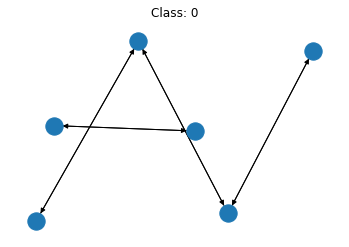

In [55]:
g, label = dataset[0]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx(node_attrs=['position'])
position = dict(G.nodes(data='position'))

position = {k: v.numpy() for k, v in position.items()}
nx.draw(G, ax=ax, pos=position)
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

## GNN tasks

<center width="100%" style="padding:10px"><img src="https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/gnn_task.png?raw=1" width="800px"></center>

In this tutorial we will cover:


*   Graph Classification
*   Node classification



## Prepare DataLoader

In this stage, we will continue our tutorial with the ```MiniGCDataset``` dataset.

```torch.utils.data.DataLoader``` is an iterator which provides:


*   Data batching
*   Shuffling the data
*   Parallel data loading

In our specific case, we need to deal with graphs of many sizes. Hence, we define a new collate function makin guse of the method ```dgl.batch```.

In this example we will work with the MiniGCDataset

In [56]:
from torch.utils.data import DataLoader

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

# Define the corresponding subsets for train, validation and test.
trainset = dgl.data.MiniGCDataset(1000, 23, 50)
validset = dgl.data.MiniGCDataset(100, 23, 100)
testset = dgl.data.MiniGCDataset(500, 23, 100)

# Define the three dataloaders. Train data will be shuffled at each epoch
train_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)
valid_loader = DataLoader(validset, batch_size=32, collate_fn=collate)
test_loader = DataLoader(testset, batch_size=32, collate_fn=collate)

## Define GNN model

We have two options.

*   To define our own GNN layers (see next section)
*   To use predefined GNN layers (skip to NN Modules)




### Define our own Model

To define a Graph Convolution, three functions have to be defined:

*   Message: Decide which information is sent by a node
*   Reduce: Aggregate the messages.
*   NodeApply: Update the node features that are recieved from the reduce function

<center width="100%" style="padding:10px"><img src="https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/gnn_layer.png?raw=1" width="800px"></center>

Let us see how can we define this functions

In [57]:
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')
def message_func(edges):
    return {'m': edges.src['h']}

def reduce(nodes):
  """Take an average over all neighbor node features hu and use it to
  overwrite the original node feature."""
  accum = torch.sum(nodes.mailbox['m'], 1)
  return {'m': accum}

class NodeApplyModule(nn.Module):
  """Update the node feature hv with ReLU(Whv+b)."""
  def __init__(self, in_feats, out_feats, activation):
    super(NodeApplyModule, self).__init__()
    self.linear = nn.Linear(in_feats, out_feats)
    self.activation = activation

  def forward(self, node):
    h = torch.cat([node.data['h'], node.data['m']],1)
    h = self.linear(h)
    h = self.activation(h)
    return {'h' : h}  
  
class GNN(nn.Module):
  """Define a GNN layer"""
  def __init__(self, in_feats, out_feats, activation):
    super(GNN, self).__init__()
    self.apply_mod = NodeApplyModule(2*in_feats, out_feats, activation)
    
  def forward(self, g, feature):
    # Initialize the node features with h.
    g.ndata['h'] = feature
    g.update_all(msg, reduce)
    g.apply_nodes(func=self.apply_mod)
    return g.ndata.pop('h')
  
class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GNN(in_dim, hidden_dim, F.relu),
        GNN(hidden_dim, hidden_dim, F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g):
    # For undirected graphs, in_degree is the same as
    # out_degree.
    h = g.in_degrees().view(-1, 1).float()
    
    if torch.cuda.is_available():
      h = h.cuda() 
    for conv in self.layers:
      h = conv(g, h)
    g.ndata['h'] = h
    hg = dgl.mean_nodes(g, 'h')
    return self.classify(hg)

#### Training example for graph classification

In [58]:
import torch
import torch.optim as optim

model = Net(1, 256, trainset.num_classes)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []
for epoch in range(80):
  epoch_loss = 0
  for iter, (bg, label) in enumerate(train_loader):
    if torch.cuda.is_available():
      label = label.cuda()
      bg = bg.to(label.device)
    prediction = model(bg)
    loss = loss_func(prediction, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 1448.5602
Epoch 1, loss 145.3685
Epoch 2, loss 104.7946
Epoch 3, loss 47.6376
Epoch 4, loss 45.2736
Epoch 5, loss 5.4118
Epoch 6, loss 1.9155
Epoch 7, loss 3.4976
Epoch 8, loss 0.7546
Epoch 9, loss 0.3901
Epoch 10, loss 0.3300
Epoch 11, loss 0.2899
Epoch 12, loss 0.3009
Epoch 13, loss 0.2818
Epoch 14, loss 0.2493
Epoch 15, loss 0.2773
Epoch 16, loss 0.2511
Epoch 17, loss 0.2401
Epoch 18, loss 0.2137
Epoch 19, loss 0.2314
Epoch 20, loss 0.2370
Epoch 21, loss 0.2538
Epoch 22, loss 0.2544
Epoch 23, loss 0.1869
Epoch 24, loss 0.1564
Epoch 25, loss 0.2101
Epoch 26, loss 0.1672
Epoch 27, loss 0.1550
Epoch 28, loss 0.1482
Epoch 29, loss 0.1325
Epoch 30, loss 0.1101
Epoch 31, loss 0.1148
Epoch 32, loss 0.1068
Epoch 33, loss 0.1598
Epoch 34, loss 0.1246
Epoch 35, loss 0.1802
Epoch 36, loss 0.1230
Epoch 37, loss 0.1075
Epoch 38, loss 0.0883
Epoch 39, loss 0.0937
Epoch 40, loss 0.0980
Epoch 41, loss 0.0777
Epoch 42, loss 0.0731
Epoch 43, loss 0.0940
Epoch 44, loss 0.3544
Epoch 45, l

#### Evaluation

In [59]:
def accuracy(output, target):
  """Accuacy given a logit vector output and a target class
  """
  _, pred = output.topk(1)
  pred = pred.squeeze()
  correct = pred == target
  correct = correct.float()
  return correct.sum() * 100.0 / correct.shape[0]


model.eval()
acc = 0
with torch.no_grad():
  for iter, (bg, label) in enumerate(test_loader):
    if torch.cuda.is_available():
        label = label.cuda()
        bg = bg.to(label.device)
    prediction = model(bg)
    acc += accuracy(prediction, label) * label.shape[0]
acc = acc/len(testset)

print('Test accuracy {:.4f}'.format(acc))

Test accuracy 96.6000


#### Let us see some qualitative results

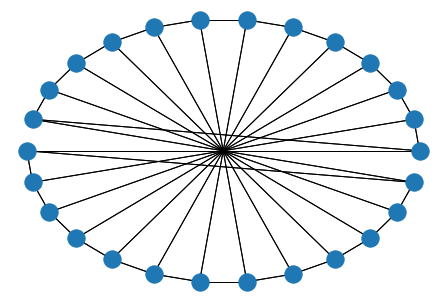

Label 7; Prediction 7


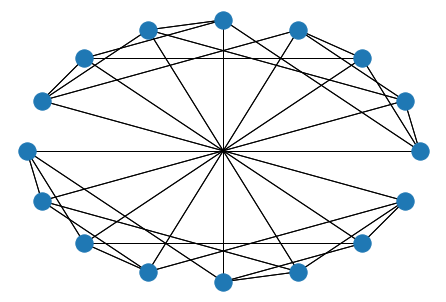

Label 4; Prediction 4


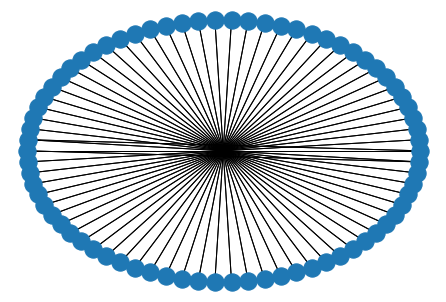

Label 7; Prediction 7


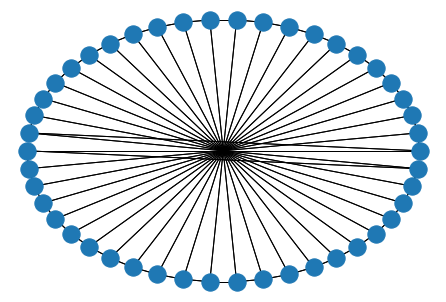

Label 7; Prediction 7


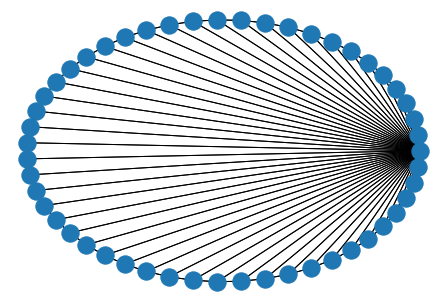

Label 2; Prediction 2


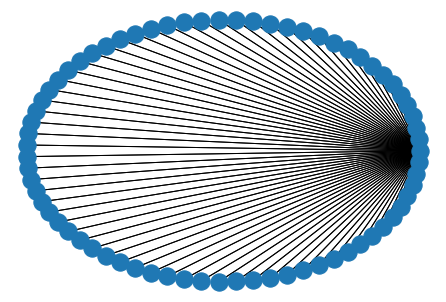

Label 1; Prediction 1


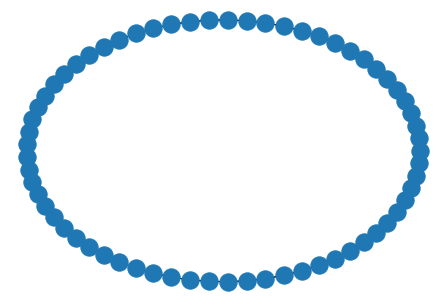

Label 0; Prediction 0


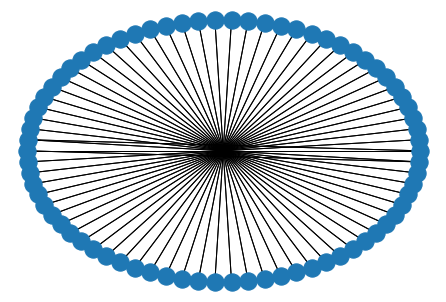

Label 7; Prediction 7


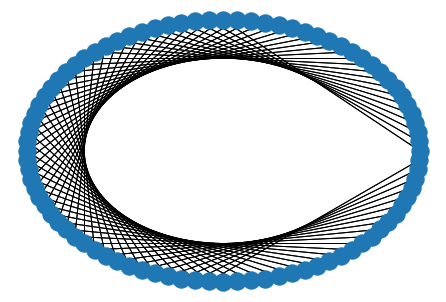

Label 5; Prediction 5


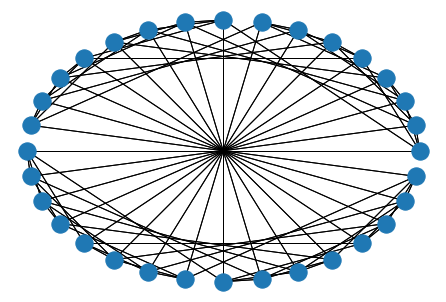

Label 4; Prediction 4


In [60]:
from random import randrange
import matplotlib.pyplot as plt
for i in range(10):
  index = randrange(len(testset))
  g, label = testset[index]
  pred = model(g.to('cuda'))
  _, pred = pred.topk(1)
  G = g.to_networkx()
  plt.figure(i)
  nx.draw(G, pos=nx.circular_layout(G), arrows=False)
  plt.show()
  print('Label {}; Prediction {}'.format(label, pred.item()))

### NN Modules

Several GNN layers are provided by default as [NN Modules](https://docs.dgl.ai/api/python/nn.pytorch.html#graphconv).

**Choose the network to use, either with NN Modules or defining it as it has been shown before.**

Lets see one example with the classical GraphConv

$$
h_i^{(l+1)} = \sigma(b^{(l)} + \sum_{j\in\mathcal{N}(i)}\frac{1}{c_{ji}}h_j^{(l)}W^{(l)})
$$

In [61]:
from dgl.nn.pytorch import GraphConv

class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GraphConv(in_dim, hidden_dim, activation=F.relu),
        GraphConv(hidden_dim, hidden_dim, activation=F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g):
    # Use node degree as the initial node feature. For undirected graphs, the in-degree
    # is the same as the out_degree.
    h = g.in_degrees().view(-1, 1).float()
    
    if torch.cuda.is_available():
      h = h.cuda() 
      
    for conv in self.layers:
      h = conv(g, h)
      
    g.ndata['h'] = h
    hg = dgl.mean_nodes(g, 'h')
    return self.classify(hg)

#### Training example for graph classification

In [62]:
import torch
import torch.optim as optim

model = Net(1, 256, trainset.num_classes)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []
for epoch in range(80):
  epoch_loss = 0
  for iter, (bg, label) in enumerate(train_loader):
    if torch.cuda.is_available():
      label = label.cuda()
      bg = bg.to(label.device)
    prediction = model(bg)
    loss = loss_func(prediction, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 1.9329
Epoch 1, loss 1.2793
Epoch 2, loss 0.7236
Epoch 3, loss 0.6446
Epoch 4, loss 0.5466
Epoch 5, loss 0.4794
Epoch 6, loss 0.4754
Epoch 7, loss 0.3968
Epoch 8, loss 0.3518
Epoch 9, loss 0.3874
Epoch 10, loss 0.2899
Epoch 11, loss 0.3136
Epoch 12, loss 0.2500
Epoch 13, loss 0.2027
Epoch 14, loss 0.2942
Epoch 15, loss 0.2302
Epoch 16, loss 0.1431
Epoch 17, loss 0.1506
Epoch 18, loss 0.1650
Epoch 19, loss 0.1285
Epoch 20, loss 0.1828
Epoch 21, loss 0.4569
Epoch 22, loss 0.3317
Epoch 23, loss 0.2269
Epoch 24, loss 0.7342
Epoch 25, loss 0.2464
Epoch 26, loss 0.1705
Epoch 27, loss 0.1513
Epoch 28, loss 0.1280
Epoch 29, loss 0.1226
Epoch 30, loss 0.1014
Epoch 31, loss 0.0907
Epoch 32, loss 0.1232
Epoch 33, loss 0.1023
Epoch 34, loss 0.0810
Epoch 35, loss 0.0886
Epoch 36, loss 0.0899
Epoch 37, loss 0.0884
Epoch 38, loss 0.1516
Epoch 39, loss 0.4640
Epoch 40, loss 0.1209
Epoch 41, loss 0.0751
Epoch 42, loss 0.0807
Epoch 43, loss 0.0657
Epoch 44, loss 0.0512
Epoch 45, loss 0.048

#### Evaluation

In [63]:
def accuracy(output, target):
  """Accuacy given a logit vector output and a target class
  """
  _, pred = output.topk(1)
  pred = pred.squeeze()
  correct = pred == target
  correct = correct.float()
  return correct.sum() * 100.0 / correct.shape[0]


model.eval()
acc = 0
with torch.no_grad():
  for iter, (bg, label) in enumerate(test_loader):
    if torch.cuda.is_available():
        label = label.cuda()
        bg = bg.to(label.device)
    prediction = model(bg)
    acc += accuracy(prediction, label) * label.shape[0]
acc = acc/len(testset)

print('Test accuracy {:.4f}'.format(acc))

Test accuracy 99.4000


#### Plot results

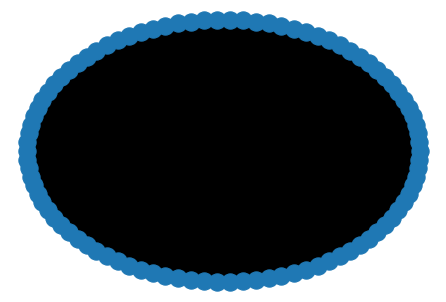

Label 6; Prediction 6


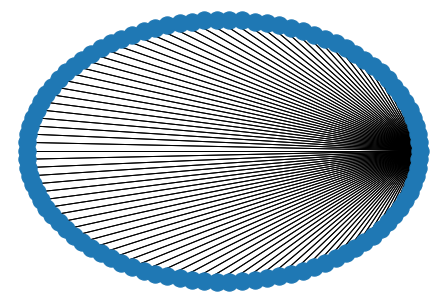

Label 1; Prediction 1


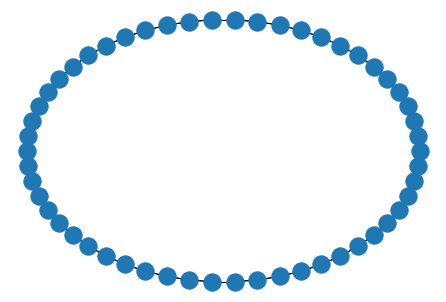

Label 0; Prediction 0


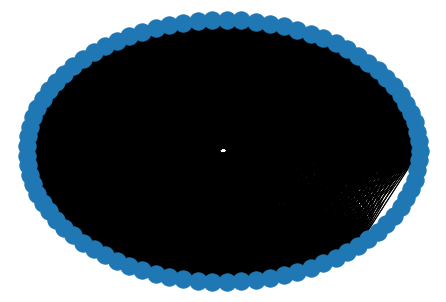

Label 3; Prediction 3


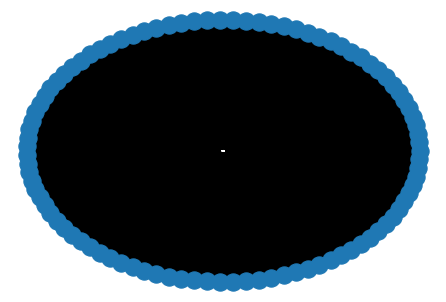

Label 6; Prediction 6


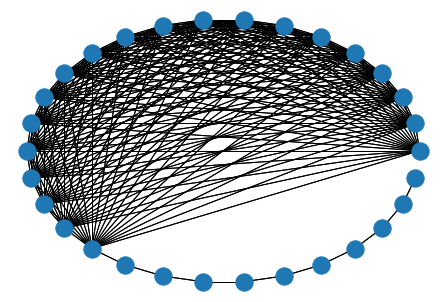

Label 3; Prediction 3


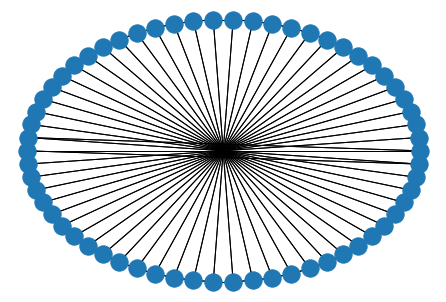

Label 7; Prediction 7


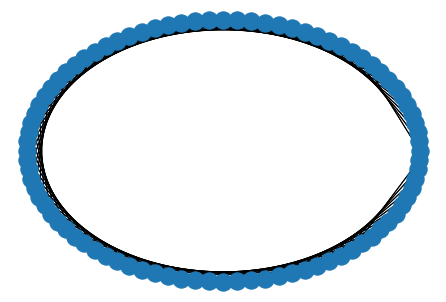

Label 5; Prediction 5


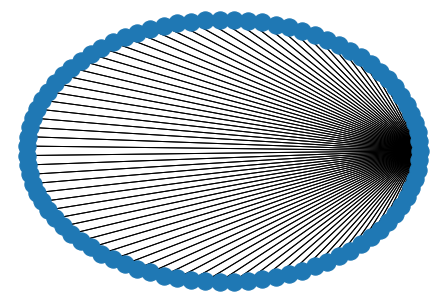

Label 1; Prediction 1


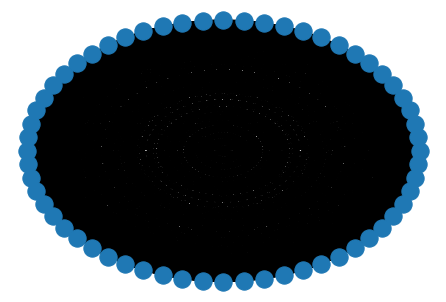

Label 6; Prediction 6


In [64]:
from random import randrange
import matplotlib.pyplot as plt
for i in range(10):
  index = randrange(len(testset))
  g, label = testset[index]
  pred = model(g.to('cuda'))
  _, pred = pred.topk(1)
  G = g.to_networkx()
  plt.figure(i)
  nx.draw(G, pos=nx.circular_layout(G), arrows=False)
  plt.show()
  print('Label {}; Prediction {}'.format(label, pred.item()))

## Node classification example

We will study this problem with the Cora Graph Dataset

### Define the data

In [65]:
dataset = dgl.data.CoraGraphDataset()

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [66]:
dataset[0]


Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

### Define the model

Note that now, we do not require a global pooling (Readout function).

In [121]:
from dgl.nn import GATConv

class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GATConv(in_dim, hidden_dim, 1, activation=F.relu),
        GATConv(hidden_dim, hidden_dim, 1, activation=F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g, feat):
    
    h = feat
    if torch.cuda.is_available():
      h = h.cuda() 
      
    for conv in self.layers:
      h = conv(g, h)
    
    h = self.classify(h)
    g.ndata['h'] = h
    return h

### Training example for node classification

In [122]:
import torch
import torch.optim as optim

model = Net(dataset[0].ndata['feat'].shape[1], 64, 7)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []

graph = dataset[0] # We only have one graph
if torch.cuda.is_available():
  graph = graph.to('cuda')

train_mask = graph.ndata['train_mask']
val_mask = graph.ndata['val_mask']
test_mask = graph.ndata['test_mask']

for epoch in range(80):
  model.train()

  prediction = model(graph, graph.ndata['feat'])
  prediction = prediction.squeeze()
  loss = loss_func(prediction[train_mask], graph.ndata['label'][train_mask])

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  
  prediction = model(graph, graph.ndata['feat'])
  acc = accuracy(prediction[val_mask], graph.ndata['label'][val_mask])
  
  epoch_loss = loss.detach().item()
  print('Epoch {}, loss {:.4f}; Validation Accuracy {:.4f}'.format(epoch, epoch_loss, acc))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 1.9471; Validation Accuracy 11.4000
Epoch 1, loss 1.9425; Validation Accuracy 28.8000
Epoch 2, loss 1.9329; Validation Accuracy 49.6000
Epoch 3, loss 1.9167; Validation Accuracy 50.6000
Epoch 4, loss 1.8949; Validation Accuracy 52.0000
Epoch 5, loss 1.8658; Validation Accuracy 54.6000
Epoch 6, loss 1.8264; Validation Accuracy 57.0000
Epoch 7, loss 1.7769; Validation Accuracy 63.0000
Epoch 8, loss 1.7151; Validation Accuracy 67.2000
Epoch 9, loss 1.6411; Validation Accuracy 69.8000
Epoch 10, loss 1.5530; Validation Accuracy 71.2000
Epoch 11, loss 1.4514; Validation Accuracy 71.8000
Epoch 12, loss 1.3362; Validation Accuracy 73.0000
Epoch 13, loss 1.2084; Validation Accuracy 73.8000
Epoch 14, loss 1.0713; Validation Accuracy 74.2000
Epoch 15, loss 0.9292; Validation Accuracy 74.8000
Epoch 16, loss 0.7875; Validation Accuracy 76.6000
Epoch 17, loss 0.6516; Validation Accuracy 77.8000
Epoch 18, loss 0.5254; Validation Accuracy 77.4000
Epoch 19, loss 0.4129; Validation Accurac

### Testing

In [123]:
model.eval()
  
prediction = model(graph, graph.ndata['feat'])
prediction = prediction.squeeze()
acc = accuracy(prediction[test_mask], graph.ndata['label'][test_mask])

print('Test Accuracy {:.4f}'.format(acc))

Test Accuracy 75.1000


# Other resources



*   https://nn.labml.ai/graphs/gat/index.html

